In [ ]:
import os

# Create outputs folder if it doesn't exist
os.makedirs("outputs", exist_ok=True)

print("✅ outputs/ folder created successfully")

✅ outputs/ folder created successfully


✅ Dataset Loaded
Shape: (255058, 31)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28

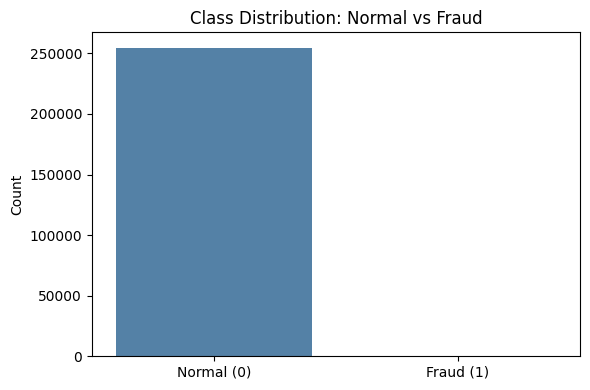

✅ Class distribution plot saved


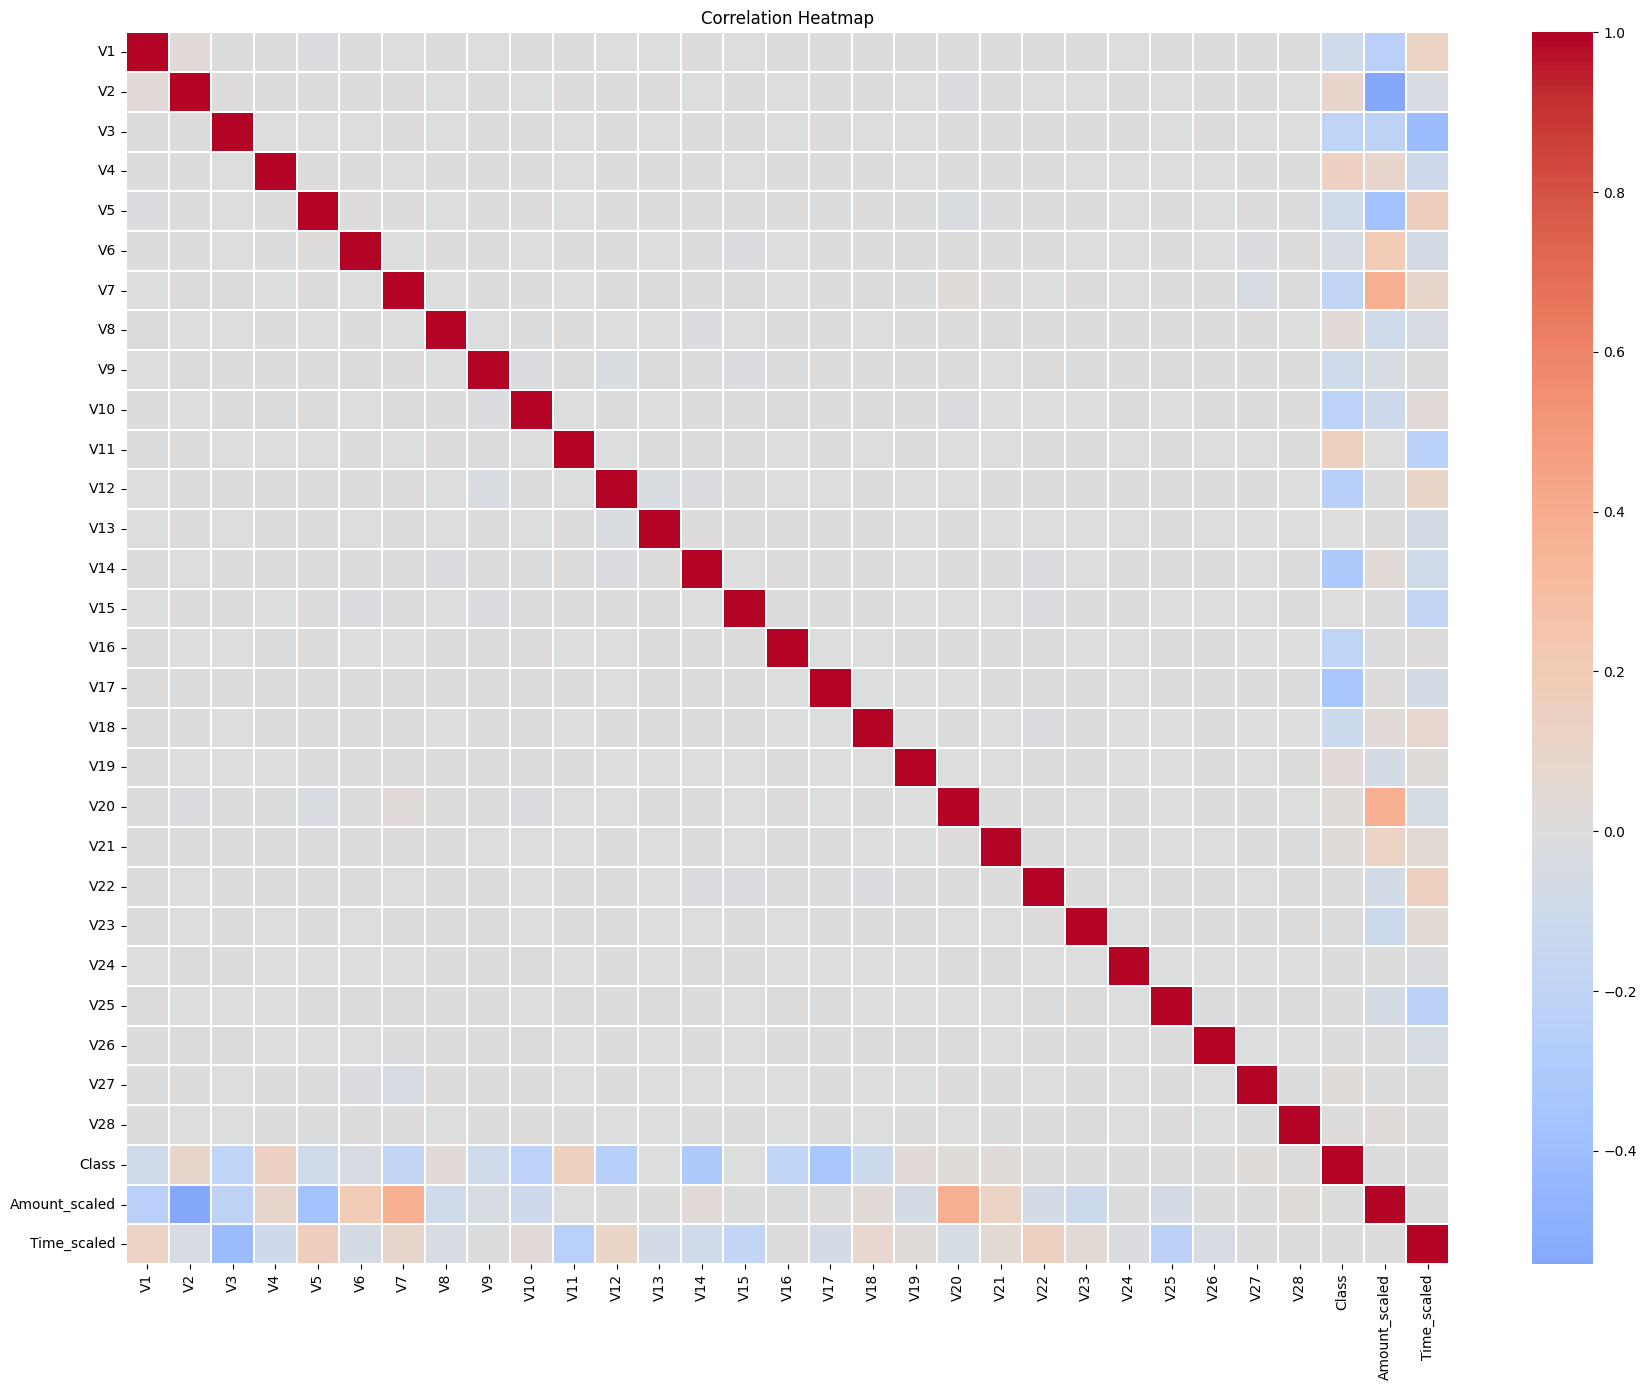

✅ Heatmap saved

🔍 Top 10 Features Correlated with Class:
 V17    0.328261
V14    0.304671
V12    0.256028
V10    0.218044
V16    0.196002
V3     0.194641
V7     0.184412
V11    0.154988
V4     0.134826
V18    0.110774
Name: Class, dtype: float64


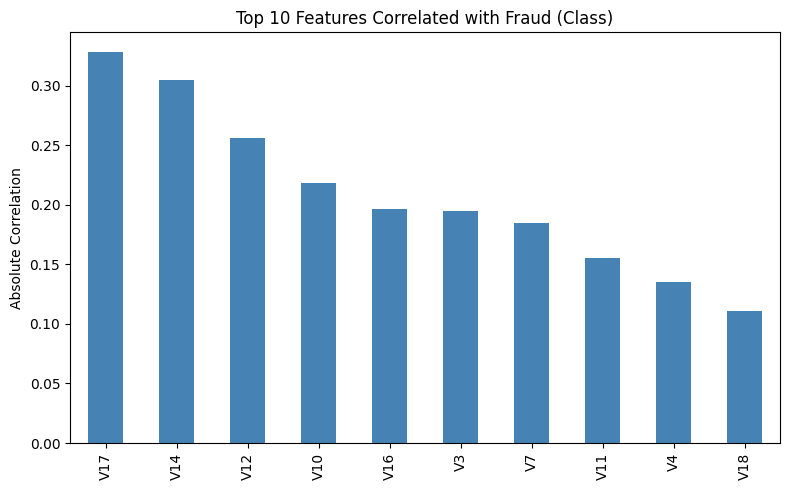

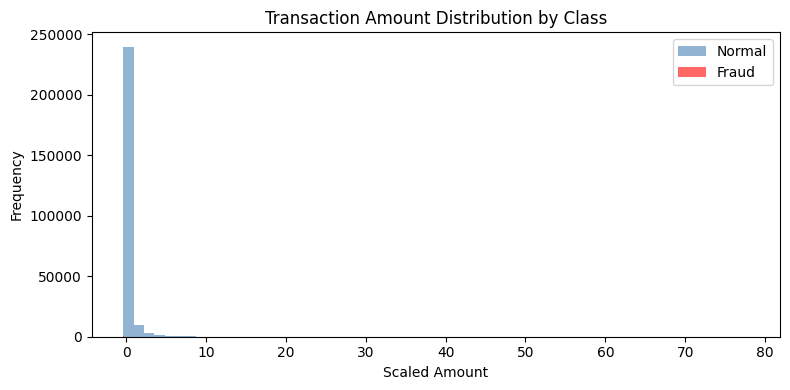

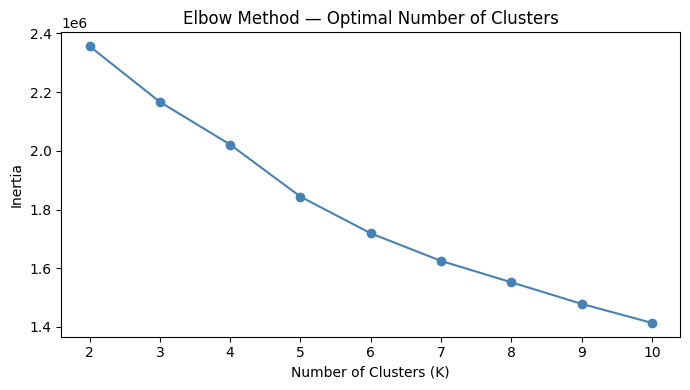

✅ Elbow plot saved

✅ Silhouette Score (K=3): 0.1017

📊 Cluster Sizes:
 Cluster
0    132443
1    122337
2       278
Name: count, dtype: int64


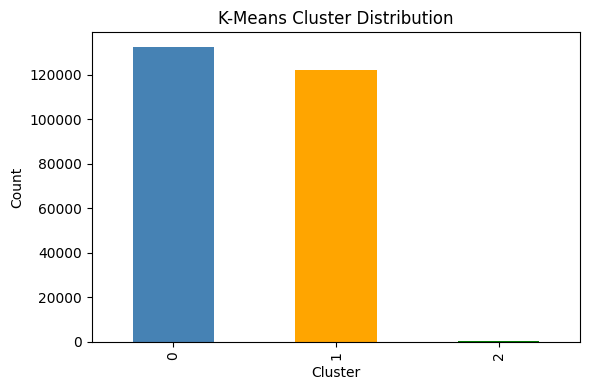


🔍 Fraud Rate per Cluster:
    Cluster  Fraud_Rate
0        0    0.000876
1        1    0.000809
2        2    0.848921


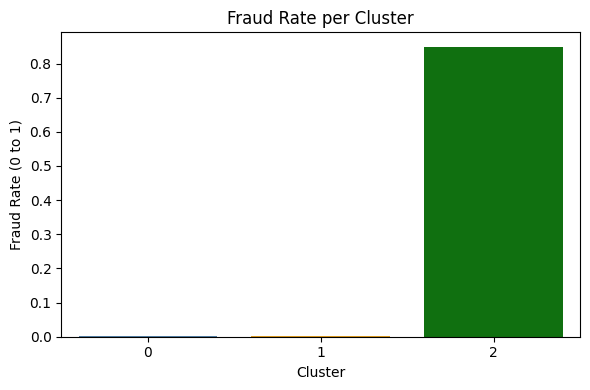

✅ Clustered dataset saved to outputs/creditcard_clustered.csv


In [ ]:
# ============================================================
# Phase 2: Data Analysis & Modeling (Python)
# Dataset: Credit Card Fraud Detection
# ============================================================

# ── 1. Import Libraries ───────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# ── 2. Load Dataset ───────────────────────────────────────────
df = pd.read_csv("creditcard_cleaned.csv")

print("✅ Dataset Loaded")
print(f"Shape: {df.shape}")
print(df.head())

# ── 3. Basic EDA ──────────────────────────────────────────────
print("\n📋 Data Types:\n", df.dtypes)
print("\n📋 Summary Statistics:\n", df.describe())
print("\n🔍 Missing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])

# ── 4. Class Distribution Plot ────────────────────────────────
plt.figure(figsize=(6, 4))
class_counts = df["Class"].value_counts()
sns.barplot(x=["Normal (0)", "Fraud (1)"], y=class_counts.values,
            palette=["steelblue", "red"])
plt.title("Class Distribution: Normal vs Fraud")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/class_distribution.png")
plt.show()
print("✅ Class distribution plot saved")

# ── 5. Correlation Heatmap ────────────────────────────────────
plt.figure(figsize=(18, 14))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0,
            linewidths=0.3, annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png")
plt.show()
print("✅ Heatmap saved")

# ── 6. Top Correlations with Class ───────────────────────────
top_corr = corr["Class"].abs().sort_values(ascending=False)[1:11]
print("\n🔍 Top 10 Features Correlated with Class:\n", top_corr)

plt.figure(figsize=(8, 5))
top_corr.plot(kind="bar", color="steelblue")
plt.title("Top 10 Features Correlated with Fraud (Class)")
plt.ylabel("Absolute Correlation")
plt.tight_layout()
plt.savefig("outputs/top_correlations.png")
plt.show()

# ── 7. Amount Distribution by Class ──────────────────────────
plt.figure(figsize=(8, 4))
for cls, color, label in zip([0, 1], ["steelblue", "red"],
                               ["Normal", "Fraud"]):
    subset = df[df["Class"] == cls]["Amount_scaled"]
    plt.hist(subset, bins=60, alpha=0.6, color=color, label=label)
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Scaled Amount")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/amount_distribution.png")
plt.show()

# ── 8. K-Means Clustering ────────────────────────────────────
# Use top correlated features for clustering
top_features = top_corr.index.tolist()
X_cluster = df[top_features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ── 9. Elbow Method — Find Optimal K ─────────────────────────
inertia = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K_range, inertia, marker="o", color="steelblue")
plt.title("Elbow Method — Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.savefig("outputs/elbow_method.png")
plt.show()
print("✅ Elbow plot saved")

# ── 10. Apply K-Means with K=3 ───────────────────────────────
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Silhouette Score
sil_score = silhouette_score(X_scaled, df["Cluster"])
print(f"\n✅ Silhouette Score (K={optimal_k}): {sil_score:.4f}")
# Score closer to 1.0 = well-separated clusters

# ── 11. Cluster Distribution ──────────────────────────────────
print("\n📊 Cluster Sizes:\n", df["Cluster"].value_counts())

plt.figure(figsize=(6, 4))
df["Cluster"].value_counts().sort_index().plot(
    kind="bar", color=["steelblue", "orange", "green"])
plt.title("K-Means Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/cluster_distribution.png")
plt.show()

# ── 12. Fraud Rate per Cluster ────────────────────────────────
fraud_rate = df.groupby("Cluster")["Class"].mean().reset_index()
fraud_rate.columns = ["Cluster", "Fraud_Rate"]
print("\n🔍 Fraud Rate per Cluster:\n", fraud_rate)

plt.figure(figsize=(6, 4))
sns.barplot(data=fraud_rate, x="Cluster", y="Fraud_Rate",
            palette=["steelblue", "orange", "green"])
plt.title("Fraud Rate per Cluster")
plt.ylabel("Fraud Rate (0 to 1)")
plt.tight_layout()
plt.savefig("outputs/fraud_rate_per_cluster.png")
plt.show()

# ── 13. Save Clustered Dataset ────────────────────────────────
df.to_csv("outputs/creditcard_clustered.csv", index=False)
print("✅ Clustered dataset saved to outputs/creditcard_clustered.csv")

✅ Libraries imported successfully

📦 Dataset Shape: (7599, 31)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

     

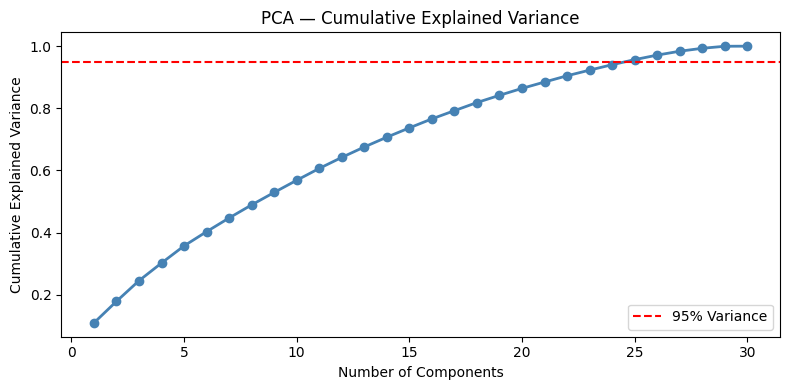

✅ PCA explained variance plot saved

✅ Components needed to explain 95% variance: 25
✅ Reduced shape: (7599, 25)


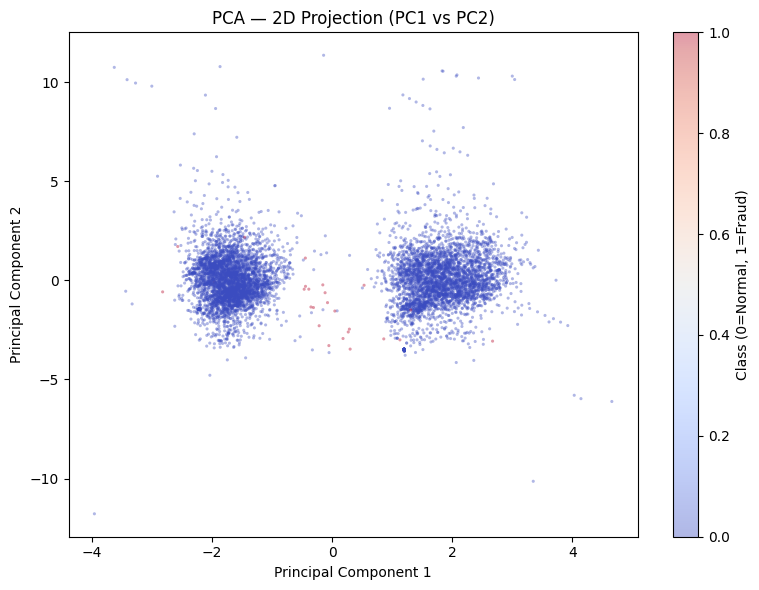

✅ PCA 2D scatter plot saved

📋 Top 5 Feature Loadings on PC1:
Time_scaled    0.487870
V12            0.427281
V13            0.359844
V14            0.313078
V17            0.293426
Name: PC1, dtype: float64


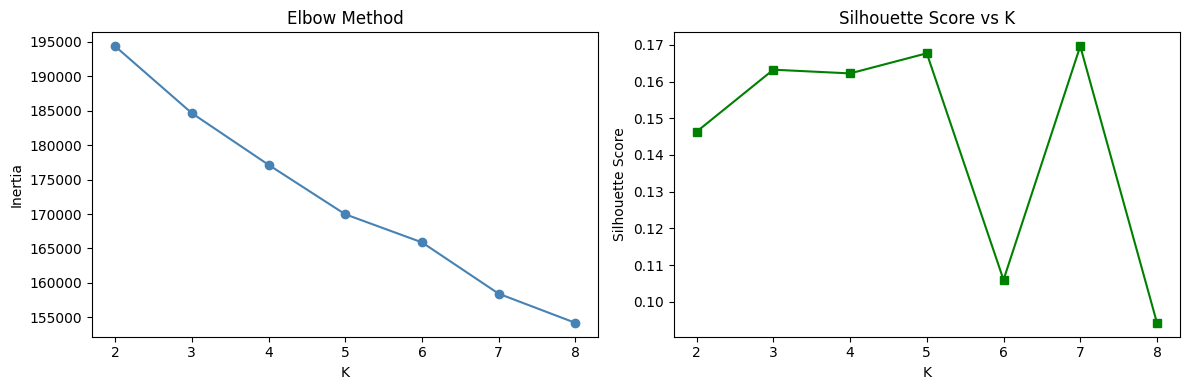

✅ Elbow & Silhouette plot saved

✅ Best K by Silhouette Score: 7
✅ Final Silhouette Score: 0.1696


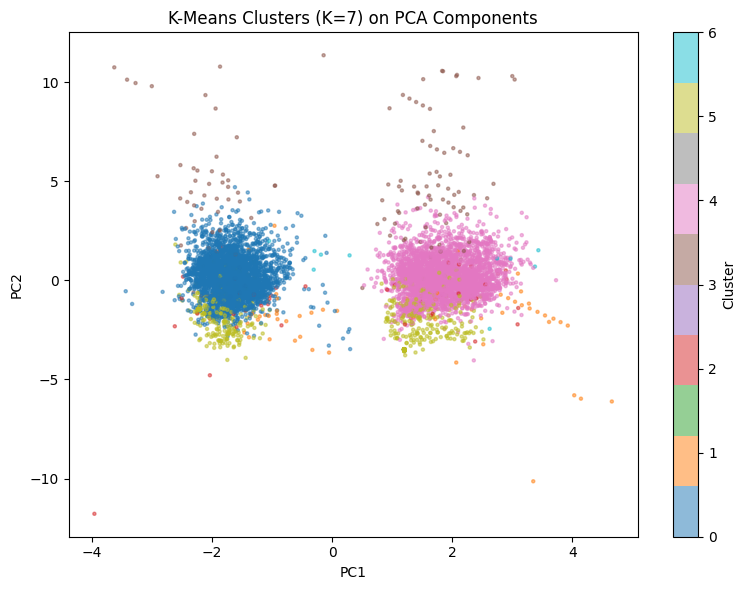

✅ Cluster scatter plot saved

📊 Fraud Rate per Cluster:
   Cluster  Total  Fraud_Count  Fraud_Rate_%
0        0   3571           19          0.53
1        1     79            0          0.00
2        2     59            1          1.69
3        3    119            0          0.00
4        4   3162            5          0.16
5        5    598            0          0.00
6        6     11            0          0.00


/tmp/ipython-input-3347762800.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_by_cluster, x="Cluster",


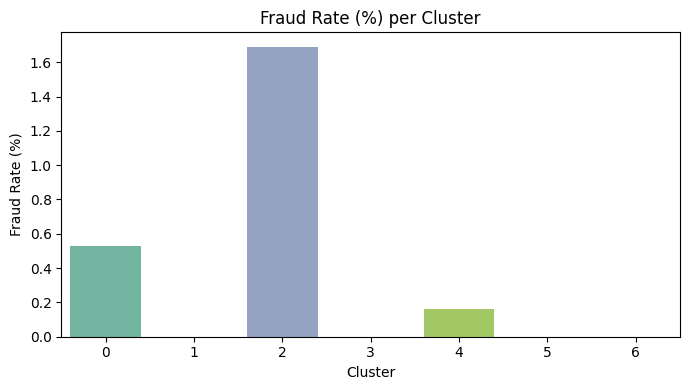

✅ Fraud rate chart saved

✅ Final dataset saved: outputs/creditcard_phase3_final.csv

🎯 Phase 3 Complete! Final shape: (7599, 33)


In [ ]:
# ============================================================
# Phase 3: Python Implementation
# Dataset: Credit Card Fraud Detection
# Techniques: NumPy, Pandas, PCA, K-Means Clustering
# ============================================================

import os
os.makedirs("outputs", exist_ok=True)

# ── 1. Import Libraries ───────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("✅ Libraries imported successfully")

# ── 2. Load Cleaned Dataset ───────────────────────────────────
df = pd.read_csv("creditcard_cleaned.csv")

print(f"\n📦 Dataset Shape: {df.shape}")
print(df.head())

# ============================================================
# SECTION A: NumPy & Pandas Data Manipulation
# ============================================================

# ── 3. Pandas — Basic Info ────────────────────────────────────
print("\n📋 Column Info:")
print(df.info())

print("\n📋 Summary Statistics:")
print(df.describe().round(3))

# ── 4. NumPy — Manual Statistical Calculations ────────────────
amount = df["Amount_scaled"].values   # Convert to NumPy array

print("\n🔢 NumPy Manual Stats on Amount_scaled:")
print(f"  Mean     : {np.mean(amount):.4f}")
print(f"  Median   : {np.median(amount):.4f}")
print(f"  Std Dev  : {np.std(amount):.4f}")
print(f"  Variance : {np.var(amount):.4f}")
print(f"  Min      : {np.min(amount):.4f}")
print(f"  Max      : {np.max(amount):.4f}")
print(f"  25th pct : {np.percentile(amount, 25):.4f}")
print(f"  75th pct : {np.percentile(amount, 75):.4f}")

# ── 5. Pandas — Fraud vs Normal Comparison Table ──────────────
print("\n📊 Mean Feature Values by Class:")
class_means = df.groupby("Class").mean().round(3)
print(class_means)

# ── 6. Pandas — Feature Engineering ──────────────────────────
# Flag high-value transactions (above 75th percentile)
threshold = np.percentile(df["Amount_scaled"].values, 75)
df["High_Value"] = (df["Amount_scaled"] > threshold).astype(int)

print(f"\n🏷️ High-Value Transaction threshold: {threshold:.4f}")
print(df["High_Value"].value_counts())

# ── 7. NumPy — Correlation with Class (manual) ────────────────
print("\n🔍 NumPy Correlation of each feature with Class:")
features = [col for col in df.columns if col not in ["Class", "High_Value"]]
correlations = {}

for col in features:
    corr = np.corrcoef(df[col].values, df["Class"].values)[0, 1]
    correlations[col] = round(abs(corr), 4)

corr_series = pd.Series(correlations).sort_values(ascending=False)
print(corr_series.head(10))

# ============================================================
# SECTION B: Dimensionality Reduction — PCA
# ============================================================

# ── 8. Prepare Features for PCA ───────────────────────────────
X = df.drop(columns=["Class", "High_Value"])
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n✅ Feature matrix shape for PCA: {X_scaled.shape}")

# ── 9. Apply PCA — Explained Variance ─────────────────────────
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_var) + 1), explained_var,
         marker="o", color="steelblue", linewidth=2)
plt.axhline(y=0.95, color="red", linestyle="--", label="95% Variance")
plt.title("PCA — Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.tight_layout()
plt.savefig("outputs/pca_explained_variance.png")
plt.show()
print("✅ PCA explained variance plot saved")

# ── 10. Choose Optimal Components ────────────────────────────
n_components = np.argmax(explained_var >= 0.95) + 1
print(f"\n✅ Components needed to explain 95% variance: {n_components}")

# ── 11. Apply PCA with Optimal Components ─────────────────────
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"✅ Reduced shape: {X_pca.shape}")

# ── 12. PCA 2D Scatter Plot (PC1 vs PC2) ──────────────────────
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=y, cmap="coolwarm", alpha=0.4,
                      s=5, linewidths=0)
plt.colorbar(scatter, label="Class (0=Normal, 1=Fraud)")
plt.title("PCA — 2D Projection (PC1 vs PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.savefig("outputs/pca_2d_scatter.png")
plt.show()
print("✅ PCA 2D scatter plot saved")

# ── 13. PCA Component Loadings ────────────────────────────────
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=X.columns
)

print("\n📋 Top 5 Feature Loadings on PC1:")
print(loadings["PC1"].abs().sort_values(ascending=False).head(5))

# ============================================================
# SECTION C: K-Means Clustering on PCA Output
# ============================================================

# ── 14. Elbow Method on PCA Data ──────────────────────────────
inertia = []
sil_scores = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(K_range, inertia, marker="o", color="steelblue")
axes[0].set_title("Elbow Method")
axes[0].set_xlabel("K")
axes[0].set_ylabel("Inertia")

axes[1].plot(K_range, sil_scores, marker="s", color="green")
axes[1].set_title("Silhouette Score vs K")
axes[1].set_xlabel("K")
axes[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.savefig("outputs/kmeans_elbow_silhouette.png")
plt.show()
print("✅ Elbow & Silhouette plot saved")

# ── 15. Final K-Means with Best K ────────────────────────────
best_k = sil_scores.index(max(sil_scores)) + 2  # offset by 2 (range starts at 2)
print(f"\n✅ Best K by Silhouette Score: {best_k}")

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(X_pca)

final_sil = silhouette_score(X_pca, df["Cluster"])
print(f"✅ Final Silhouette Score: {final_sil:.4f}")

# ── 16. Cluster Scatter Plot on PCA ───────────────────────────
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=df["Cluster"], cmap="tab10",
                      alpha=0.5, s=5)
plt.colorbar(scatter, label="Cluster")
plt.title(f"K-Means Clusters (K={best_k}) on PCA Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("outputs/kmeans_pca_clusters.png")
plt.show()
print("✅ Cluster scatter plot saved")

# ── 17. Fraud Rate per Cluster ────────────────────────────────
fraud_by_cluster = df.groupby("Cluster")["Class"].agg(
    Total="count",
    Fraud_Count="sum"
).reset_index()

fraud_by_cluster["Fraud_Rate_%"] = (
    fraud_by_cluster["Fraud_Count"] / fraud_by_cluster["Total"] * 100
).round(2)

print("\n📊 Fraud Rate per Cluster:")
print(fraud_by_cluster)

plt.figure(figsize=(7, 4))
sns.barplot(data=fraud_by_cluster, x="Cluster",
            y="Fraud_Rate_%", palette="Set2")
plt.title("Fraud Rate (%) per Cluster")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Cluster")
plt.tight_layout()
plt.savefig("outputs/fraud_rate_cluster.png")
plt.show()
print("✅ Fraud rate chart saved")

# ── 18. Save Final Dataset ────────────────────────────────────
df.to_csv("outputs/creditcard_phase3_final.csv", index=False)
print("\n✅ Final dataset saved: outputs/creditcard_phase3_final.csv")
print(f"\n🎯 Phase 3 Complete! Final shape: {df.shape}")